In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('historical_2003-2014.csv')

In [ ]:
df.head()

,point_id,lat_dd,long_dd,aspect,cdd,dem,dist_snowice,dist_water,evspsbl,hurs,...,tx_max,txgt_30,cdm_historical,cdm_model,cdm_p_value,dist_crop,dist_roads,dist_urban,gdp,pop
0,1,41.7172,-82.7113,NaN,16.1667,174.0,2668.6936,0.0,NaN,NaN,...,32.9776,14.0417,NaN,NaN,NaN,36.4006,28.6155,69.4622,15171.0,3.0
1,2,41.7172,-82.6280,NaN,16.5000,174.0,2663.2173,0.0,NaN,NaN,...,32.7934,12.5417,NaN,NaN,NaN,33.5410,28.6155,68.0074,10837.0,3.0
2,3,41.7172,-82.5447,NaN,16.3750,174.0,2662.7244,0.0,NaN,NaN,...,32.6559,10.7917,NaN,NaN,NaN,35.0000,27.7681,71.0634,0.0,NaN
3,4,41.7172,-82.4613,NaN,16.3333,174.0,2661.7664,0.0,NaN,NaN,...,32.5456,9.5000,NaN,NaN,NaN,35.3553,28.6155,77.7817,0.0,NaN
4,5,41.7172,-82.3780,NaN,15.9583,174.0,2661.3013,0.0,NaN,NaN,...,32.4930,9.1250,NaN,NaN,NaN,36.4006,31.0190,80.0000,0.0,NaN


In [ ]:
df.shape

(244016, 34)

In [ ]:
df['cdm_historical'].value_counts()

,count
cdm_historical,
0.0,35671
2.0,30655
1.0,25654
3.0,6502


In [ ]:
# Define the selected features
selected_features = ['soil_texture', 'soil_order', 'lulc', 'lithology']

# Display the number of unique classes for each selected feature
for feature in selected_features:
    num_classes = df[feature].nunique()
    print(f"Number of classes in '{feature}': {num_classes}")

Number of classes in 'soil_texture': 10
Number of classes in 'soil_order': 11
Number of classes in 'lulc': 7
Number of classes in 'lithology': 33


In [ ]:
# Drop the irrelevant features
df = df.drop(columns= ['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

In [ ]:
# rows where the target feature 'cdm_historical' is null
null_target_count = df['cdm_historical'].isnull().sum()
print(f"Number of null values in 'cdm_historical': {null_target_count}")

Number of null values in 'cdm_historical': 145534


In [ ]:
# Forward fill to propagate previous values to null values
df1 = df.fillna(method='ffill')

# Backward fill to cover any remaining null values, if any
df1 = df.fillna(method='bfill')

<ipython-input-8-cf2238217814>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill')
<ipython-input-8-cf2238217814>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='bfill')


In [ ]:
# Verify if any null values remain
print("Remaining null values after filling:", df1.isnull().sum().sum())

Remaining null values after filling: 130241


In [ ]:
# Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Verify that there are no null values in the target feature
print("Number of null values in 'cdm_historical' after dropping:", df1['cdm_historical'].isnull().sum())

# Check the new shape of the DataFrame
print("Shape of DataFrame after dropping rows with null target:", df1.shape)


Number of null values in 'cdm_historical' after dropping: 0
Shape of DataFrame after dropping rows with null target: (115958, 30)


In [ ]:
# Drop all rows with any null values
df1 = df1.dropna()

# Check the shape to see how many rows remain
print("Shape of DataFrame after dropping all rows with null values:", df1.shape)

# Verify there are no null values left
print("Remaining null values in each column:\n", df1.isnull().sum())


Shape of DataFrame after dropping all rows with null values: (115958, 30)
Remaining null values in each column:
 point_id          0
lat_dd            0
long_dd           0
aspect            0
cdd               0
dem               0
dist_snowice      0
dist_water        0
evspsbl           0
hurs              0
lai               0
lithology         0
lulc              0
mrro              0
mrsos             0
prcptot           0
r10mm             0
rlds              0
rsds              0
sfcWind           0
slope             0
soil_order        0
soil_texture      0
tg_mean           0
tx_max            0
txgt_30           0
cdm_historical    0
dist_crop         0
dist_roads        0
dist_urban        0
dtype: int64


In [ ]:
df.head(20)

,point_id,lat_dd,long_dd,aspect,cdd,dem,dist_snowice,dist_water,evspsbl,hurs,...,slope,soil_order,soil_texture,tg_mean,tx_max,txgt_30,cdm_historical,dist_crop,dist_roads,dist_urban
0,1,41.7172,-82.7113,NaN,16.1667,174.0,2668.6936,0.0,NaN,NaN,...,0.0,4.0,2.0,10.6867,32.9776,14.0417,NaN,36.4006,28.6155,69.4622
1,2,41.7172,-82.6280,NaN,16.5000,174.0,2663.2173,0.0,NaN,NaN,...,0.0,4.0,2.0,10.6280,32.7934,12.5417,NaN,33.5410,28.6155,68.0074
2,3,41.7172,-82.5447,NaN,16.3750,174.0,2662.7244,0.0,NaN,NaN,...,0.0,NaN,2.0,10.6023,32.6559,10.7917,NaN,35.0000,27.7681,71.0634
3,4,41.7172,-82.4613,NaN,16.3333,174.0,2661.7664,0.0,NaN,NaN,...,0.0,NaN,2.0,10.5756,32.5456,9.5000,NaN,35.3553,28.6155,77.7817
4,5,41.7172,-82.3780,NaN,15.9583,174.0,2661.3013,0.0,NaN,NaN,...,0.0,NaN,2.0,10.5813,32.4930,9.1250,NaN,36.4006,31.0190,80.0000
5,6,41.8006,-82.8780,NaN,16.3333,174.0,2660.8506,0.0,NaN,76.8651,...,0.0,NaN,2.0,10.6517,33.2383,16.2500,NaN,25.0000,18.5122,52.2015
6,7,41.8006,-82.7947,NaN,16.2500,174.0,2659.7793,0.0,NaN,76.9027,...,0.0,NaN,2.0,10.5983,33.0912,15.0417,NaN,25.0000,18.5122,55.9017
7,8,41.8006,-82.7113,NaN,16.5417,174.0,2659.2576,0.0,NaN,76.9403,...,0.0,4.0,2.0,10.5764,32.9606,14.0000,NaN,25.4951,19.7590,58.3095
8,9,41.8006,-82.6280,NaN,16.4167,174.0,2653.2668,0.0,NaN,76.9801,...,0.0,4.0,2.0,10.5501,32.7963,12.4583,NaN,25.0000,19.7590,60.2080
9,10,41.8006,-82.5447,NaN,16.5417,174.0,2652.7720,0.0,NaN,77.0221,...,0.0,NaN,2.0,10.5226,32.6536,11.0417,NaN,25.0000,18.5122,63.6396


In [ ]:
df1.head(20)

,point_id,lat_dd,long_dd,aspect,cdd,dem,dist_snowice,dist_water,evspsbl,hurs,...,slope,soil_order,soil_texture,tg_mean,tx_max,txgt_30,cdm_historical,dist_crop,dist_roads,dist_urban
0,1,41.7172,-82.7113,20.0,16.1667,174.0,2668.6936,0.0,0.000026,76.8651,...,0.0,4.0,2.0,10.6867,32.9776,14.0417,1.0,36.4006,28.6155,69.4622
1,2,41.7172,-82.6280,20.0,16.5000,174.0,2663.2173,0.0,0.000026,76.8651,...,0.0,4.0,2.0,10.6280,32.7934,12.5417,1.0,33.5410,28.6155,68.0074
2,3,41.7172,-82.5447,20.0,16.3750,174.0,2662.7244,0.0,0.000026,76.8651,...,0.0,4.0,2.0,10.6023,32.6559,10.7917,1.0,35.0000,27.7681,71.0634
3,4,41.7172,-82.4613,20.0,16.3333,174.0,2661.7664,0.0,0.000026,76.8651,...,0.0,4.0,2.0,10.5756,32.5456,9.5000,1.0,35.3553,28.6155,77.7817
4,5,41.7172,-82.3780,20.0,15.9583,174.0,2661.3013,0.0,0.000026,76.8651,...,0.0,4.0,2.0,10.5813,32.4930,9.1250,1.0,36.4006,31.0190,80.0000
5,6,41.8006,-82.8780,20.0,16.3333,174.0,2660.8506,0.0,0.000026,76.8651,...,0.0,4.0,2.0,10.6517,33.2383,16.2500,1.0,25.0000,18.5122,52.2015
6,7,41.8006,-82.7947,20.0,16.2500,174.0,2659.7793,0.0,0.000026,76.9027,...,0.0,4.0,2.0,10.5983,33.0912,15.0417,1.0,25.0000,18.5122,55.9017
7,8,41.8006,-82.7113,20.0,16.5417,174.0,2659.2576,0.0,0.000026,76.9403,...,0.0,4.0,2.0,10.5764,32.9606,14.0000,1.0,25.4951,19.7590,58.3095
8,9,41.8006,-82.6280,20.0,16.4167,174.0,2653.2668,0.0,0.000026,76.9801,...,0.0,4.0,2.0,10.5501,32.7963,12.4583,1.0,25.0000,19.7590,60.2080
9,10,41.8006,-82.5447,20.0,16.5417,174.0,2652.7720,0.0,0.000026,77.0221,...,0.0,6.0,2.0,10.5226,32.6536,11.0417,1.0,25.0000,18.5122,63.6396


In [ ]:
df.shape

(244016, 30)

In [ ]:
df1.shape

(115958, 30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Convert categorical columns to 'category' data type
df1 = df1.astype(
    {
        'lulc': 'category',
        'lithology': 'category',
        'soil_texture': 'category',
        'soil_order': 'category'
    }
)

In [ ]:
# step 1: Split data into features and target
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# step 2: Split data into training, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban'
                     ]

In [ ]:
# Step 3: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)  # Updated keyword argument
scaler = StandardScaler()

# Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Manually set column names for the encoded features using get_feature_names_out
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names


# Step 5: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)

# Step 6: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)


In [ ]:
# Verify the final processed data
print("X_train_final shape:", X_train_final.shape)
print("X_val_final shape:", X_val_final.shape)
print("X_test_final shape:", X_test_final.shape)

X_train_final shape: (81170, 83)
X_val_final shape: (17394, 83)
X_test_final shape: (17394, 83)


In [ ]:
X_train.head()

,point_id,lat_dd,long_dd,aspect,cdd,dem,dist_snowice,dist_water,evspsbl,hurs,...,sfcWind,slope,soil_order,soil_texture,tg_mean,tx_max,txgt_30,dist_crop,dist_roads,dist_urban
87961,87962,56.4672,-67.8780,48.0,13.9167,370.7839,688.2042,11.1803,0.000006,90.3213,...,2.9727,2.0,1.0,9.0,-3.9083,27.2608,0.0000,912.6472,370.1369,868.1589
6055,6056,46.4672,-78.8780,205.0,12.8333,207.6123,2041.5680,20.6155,0.000015,82.6060,...,3.2128,7.0,10.0,6.0,5.0734,32.8347,8.4167,60.4152,6.3909,47.1699
86243,86244,56.3006,-104.7113,90.0,19.6250,499.2970,969.1491,15.8114,0.000012,83.6535,...,2.6211,1.0,1.0,5.0,-0.9668,30.6682,1.3333,308.4234,45.2305,420.8622
61184,61185,53.6339,-88.4613,338.0,18.7500,184.2316,1670.0074,7.0711,0.000011,85.3149,...,2.6613,0.0,1.0,2.0,-1.2111,30.8776,1.5417,542.0332,266.1858,745.1846
108426,108427,59.0506,-77.8780,322.0,24.2917,32.6257,745.1509,0.0000,0.000006,86.9778,...,5.0244,0.0,10.0,5.0,-5.0898,23.7181,0.0000,1198.5408,584.7944,1311.1541


In [ ]:
df1['cdm_historical'].value_counts()

,count
cdm_historical,
0.0,50818
2.0,32195
1.0,26326
3.0,6619


### Organized clean code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Split data into features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']
index_columns =['point_id', 'lat_dd', 'long_dd']

# Step 9: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 10: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 11: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)

# Step 12: set columns for coordinates
X_train_index = pd.DataFrame(X_train[index_columns], columns=index_columns)
X_val_index = pd.DataFrame(X_val[index_columns], columns=index_columns)
X_test_index = pd.DataFrame(X_test[index_columns], columns=index_columns)


# Step 13: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True), X_train_index.reset_index(drop=True)] ,axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True), X_val_index.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True), X_test_index.reset_index(drop=True)], axis=1)

# Step 13: Verify the final processed data
print("X_train_final shape:", X_train_final.shape)
print("X_val_final shape:", X_val_final.shape)
print("X_test_final shape:", X_test_final.shape)


<ipython-input-1-e815703120d8>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


X_train_final shape: (170811, 86)
X_val_final shape: (36602, 86)
X_test_final shape: (36603, 86)


In [ ]:
y_train.value_counts()

,count
cdm_historical,
0.0,125972
2.0,21700
1.0,18522
3.0,4617


In [ ]:
df1['cdm_historical'].value_counts()

,count
cdm_historical,
0.0,180039
2.0,30922
1.0,26458
3.0,6597


In [ ]:
df1[df1['cdm_historical'] == 0][['evspsbl', 'lai',  'dist_crop', 'mrsos']].describe()

,evspsbl,lai,dist_crop,mrsos
count,180039.000000,180039.000000,180039.000000,180039.000000
mean,0.000006,0.769657,1199.006947,54.268757
std,0.000004,1.081406,804.481177,13.067364
min,0.000000,0.000000,0.000000,22.408400
25%,0.000003,0.000000,551.837800,43.526600
50%,0.000006,0.000600,983.933400,54.073200
75%,0.000009,1.633000,1793.108350,64.769100
max,0.000035,4.268300,3189.710000,85.893000


In [ ]:
df1[df1['cdm_historical'] == 1][['evspsbl', 'lai',  'dist_crop', 'mrsos']].describe()

,evspsbl,lai,dist_crop,mrsos
count,26458.000000,26458.000000,26458.000000,26458.000000
mean,0.000013,2.365812,175.539637,38.586560
std,0.000003,1.086121,168.580818,8.052763
min,0.000008,0.057700,0.000000,25.030000
25%,0.000012,1.508775,40.311300,33.012575
50%,0.000013,2.328900,129.807500,37.215850
75%,0.000014,3.142725,257.147800,42.400750
max,0.000035,5.273600,723.895800,74.025000


In [ ]:
df1[df1['cdm_historical'] == 2][['evspsbl', 'lai',  'dist_crop', 'mrsos']].describe()

,evspsbl,lai,dist_crop,mrsos
count,30922.000000,30922.000000,30922.000000,30922.000000
mean,0.000013,2.489475,139.234152,36.187656
std,0.000002,1.185443,155.622870,8.822485
min,0.000009,0.222100,0.000000,20.642300
25%,0.000012,1.522100,20.615500,31.025700
50%,0.000013,2.437850,78.262400,34.127600
75%,0.000015,3.421850,209.344200,39.054875
max,0.000022,5.250700,950.013100,72.586600


In [ ]:
df1[df1['cdm_historical'] == 3][['evspsbl', 'lai',  'dist_crop', 'mrsos']].describe()

,evspsbl,lai,dist_crop,mrsos
count,6597.000000,6597.000000,6597.000000,6597.000000
mean,0.000015,1.989284,19.048821,33.101663
std,0.000002,1.078252,33.635307,4.077477
min,0.000011,0.574800,0.000000,24.038500
25%,0.000014,1.140600,0.000000,29.889200
50%,0.000014,1.666000,5.000000,32.478800
75%,0.000015,2.618400,20.615500,36.255600
max,0.000023,4.826900,247.487400,45.804000


# Approach 1:
* filling null values with Backward and forward fill
* Data type conversion
* Splitting data
* Separating Index columns for later use
* Encoding categorical features and scaling numerical features
* Feature selection with MRMR
* Feature Importance with Random forest
* Model training with TabNet

In [ ]:
! pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390771 sha256=1bd75c418a6fc68a76749491a544124f249e1536a3f8a38d02b61fbb582c134a
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


<ipython-input-2-ddfd93612e77>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


Selected features using MRMR:
 ['dist_crop', 'lithology_2.0', 'lai', 'soil_texture_1.0', 'soil_order_9.0', 'soil_order_3.0', 'soil_order_2.0', 'soil_order_5.0', 'soil_order_11.0', 'mrsos', 'lithology_13.0', 'lithology_21.0', 'lulc_6.0', 'evspsbl', 'soil_texture_2.0', 'lulc_5.0', 'lithology_6.0', 'txgt_30', 'lulc_4.0', 'lithology_4.0']
Shape of X_train_mrmr: (170811, 20)
Shape of X_val_mrmr: (36602, 20)
Shape of X_test_mrmr: (36603, 20)
Top features by importance:
              Feature  Importance
13           evspsbl    0.243257
0          dist_crop    0.215354
2                lai    0.173389
9              mrsos    0.163016
17           txgt_30    0.121281
7     soil_order_5.0    0.017523
5     soil_order_3.0    0.015565
18          lulc_4.0    0.013322
14  soil_texture_2.0    0.009604
15          lulc_5.0    0.009366
3   soil_texture_1.0    0.007817
6     soil_order_2.0    0.005032
4     soil_order_9.0    0.001599
1      lithology_2.0    0.001054
19     lithology_4.0    0.000643
10 

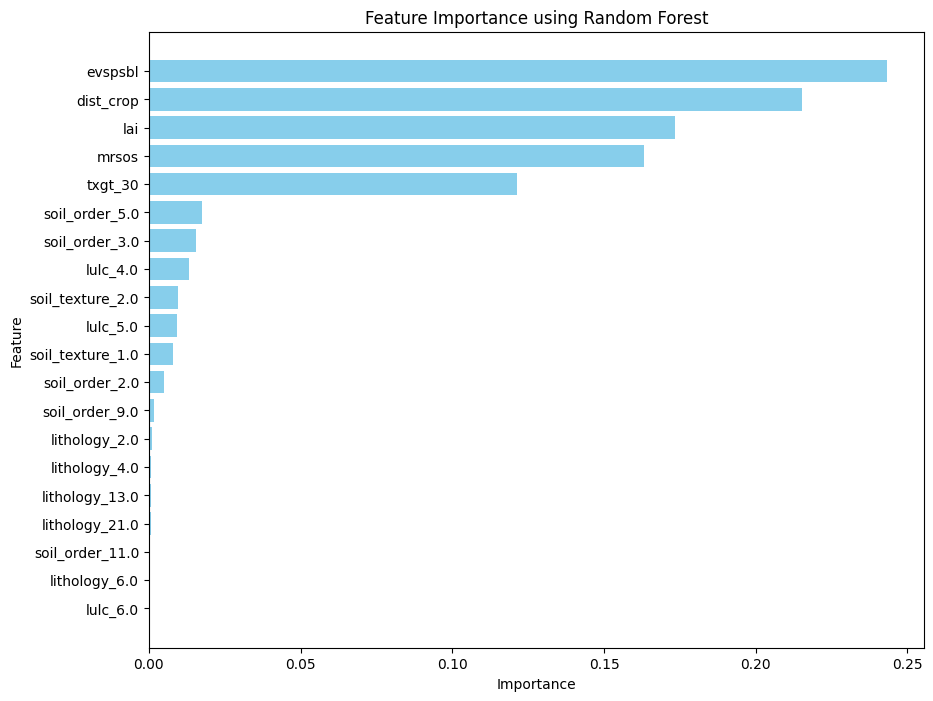

In [ ]:
import pandas as pd
import numpy as np
import pymrmr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Define features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets (keep index columns for now)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Separate out index columns in the test set for later concatenation with predictions
index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

# Step 9: Drop index columns from the training, validation, and test sets before encoding/scaling
X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

# Step 10: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

# Step 11: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 12: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 13: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)

# Step 14: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Step 15: Combine target and processed features for MRMR processing
df_mrmr = pd.concat([y_train.reset_index(drop=True), X_train_final.reset_index(drop=True)], axis=1)
df_mrmr.columns = ['target'] + list(df_mrmr.columns[1:])

# Step 16: Apply MRMR to select the top N features (e.g., top 20 features)
selected_features = pymrmr.mRMR(df_mrmr, 'MIQ', 20)
print("Selected features using MRMR:\n", selected_features)

# Step 17: Filter the training, validation, and test sets to include only selected features
X_train_mrmr = X_train_final[selected_features]
X_val_mrmr = X_val_final[selected_features]
X_test_mrmr = X_test_final[selected_features]

# Verify shapes
print("Shape of X_train_mrmr:", X_train_mrmr.shape)
print("Shape of X_val_mrmr:", X_val_mrmr.shape)
print("Shape of X_test_mrmr:", X_test_mrmr.shape)

# Step 18: Attach index columns back to the final test set for future mapping
X_test_with_index = pd.concat([X_test_index.reset_index(drop=True), X_test_mrmr.reset_index(drop=True)], axis=1)

# Step 19: Feature Importance using Random Forest
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the MRMR-selected training data
rf_model.fit(X_train_mrmr, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train_mrmr.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features by importance:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
! pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch

# Step 1: Convert data to NumPy arrays (TabNet requires this format)
X_train_mrmr_np = X_train_mrmr.to_numpy()
X_val_mrmr_np = X_val_mrmr.to_numpy()
X_test_mrmr_np = X_test_mrmr.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

# Step 2: Initialize the TabNet model
tabnet_model = TabNetClassifier(
    n_d=32,                # Width of the decision prediction layer (32 is a common choice)
    n_a=32,                # Width of the attention embedding for each mask (same as n_d)
    n_steps=3,             # Number of decision steps (3 is typical, but can be tuned)
    gamma=1.3,             # Relaxation factor
    lambda_sparse=0.01,   # Sparsity regularization
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    mask_type='entmax',    # "sparsemax" or "entmax" (entmax is better for classification)
    scheduler_params={"step_size":10, "gamma":0.8},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Step 3: Train the TabNet model
tabnet_model.fit(
    X_train=X_train_mrmr_np, y_train=y_train_np,
    eval_set=[(X_val_mrmr_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=50,       # Set maximum epochs (early stopping will likely stop it sooner)
    patience=10,          # Stop training if validation loss doesn't improve for 10 epochs
    batch_size=512,
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False
)

# Step 4: Make predictions on the test set
y_test_pred = tabnet_model.predict(X_test_mrmr_np)

# Step 5: Evaluate model performance
accuracy = accuracy_score(y_test_np, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 6: Feature importance analysis
# TabNet has an attribute for feature importance after training
feature_importances = tabnet_model.feature_importances_
importance_df_tabnet = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("TabNet Feature Importances:\n", importance_df_tabnet)

# Step 7: Concatenate predictions with the index columns for mapping
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['Predicted_cdm_historical'])
final_test_results = pd.concat([X_test_with_index.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)], axis=1)

# Display the final results
print(final_test_results.head())


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.46673 | val_accuracy: 0.83293 |  0:00:24s
epoch 1  | loss: 0.36417 | val_accuracy: 0.86367 |  0:00:47s
epoch 2  | loss: 0.32953 | val_accuracy: 0.87443 |  0:01:09s
epoch 3  | loss: 0.29858 | val_accuracy: 0.88818 |  0:01:32s
epoch 4  | loss: 0.27856 | val_accuracy: 0.90705 |  0:01:54s
epoch 5  | loss: 0.25882 | val_accuracy: 0.90938 |  0:02:17s
epoch 6  | loss: 0.24836 | val_accuracy: 0.90703 |  0:02:54s
epoch 7  | loss: 0.23714 | val_accuracy: 0.92528 |  0:03:16s
epoch 8  | loss: 0.22924 | val_accuracy: 0.91897 |  0:03:39s
epoch 9  | loss: 0.21898 | val_accuracy: 0.92102 |  0:04:02s
epoch 10 | loss: 0.20678 | val_accuracy: 0.9347  |  0:04:25s
epoch 11 | loss: 0.20289 | val_accuracy: 0.93678 |  0:04:48s
epoch 12 | loss: 0.19985 | val_accuracy: 0.93186 |  0:05:09s
epoch 13 | loss: 0.19371 | val_accuracy: 0.93918 |  0:05:32s
epoch 14 | loss: 0.19203 | val_accuracy: 0.9373  |  0:05:54s
epoch 15 | loss: 0.19139 | val_accuracy: 0.93894 |  0:06:17s
epoch 16 | loss: 0.18624

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9567

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     27085
         1.0       0.82      0.89      0.85      3911
         2.0       0.89      0.88      0.88      4616
         3.0       0.90      0.77      0.83       991

    accuracy                           0.96     36603
   macro avg       0.90      0.88      0.89     36603
weighted avg       0.96      0.96      0.96     36603

TabNet Feature Importances:
              Feature    Importance
0          dist_crop  2.535152e-01
13           evspsbl  1.452440e-01
18          lulc_4.0  1.427097e-01
9              mrsos  1.399321e-01
8    soil_order_11.0  9.332316e-02
2                lai  8.533865e-02
4     soil_order_9.0  3.503176e-02
17           txgt_30  2.800899e-02
10    lithology_13.0  2.685511e-02
16     lithology_6.0  1.602917e-02
5     soil_order_3.0  1.331198e-02
6     soil_order_2.0  1.020728e-02
3   soil_texture_1.0  5.138051e-03

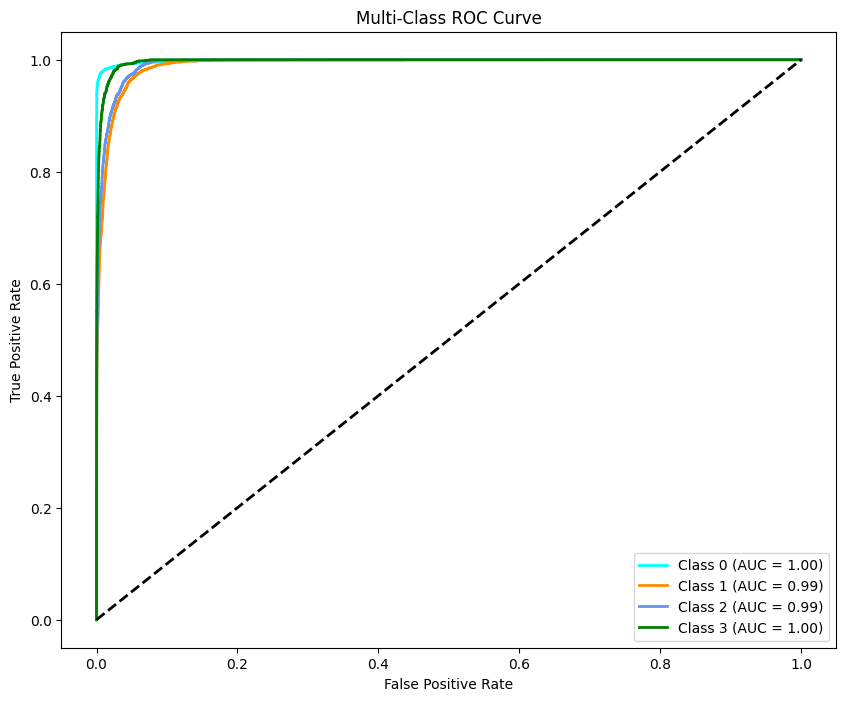

Overall Macro-Average AUC: 1.00


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Step 1: Get predicted probabilities for each class
y_test_proba = tabnet_model.predict_proba(X_test_mrmr_np)

# Step 2: Binarize the test labels for multi-class ROC
n_classes = len(np.unique(y_test_np))  # Number of classes
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

# Step 3: Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Step 5: Calculate the overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.2f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Convert target labels to one-hot encoding for multi-class classification
lb = LabelBinarizer()
y_train_oh = lb.fit_transform(y_train)
y_val_oh = lb.transform(y_val)
y_test_oh = lb.transform(y_test)

# Define the ANN model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_mrmr.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(lb.classes_), activation='softmax')  # Output layer for multi-class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_mrmr, y_train_oh,
                    validation_data=(X_val_mrmr, y_val_oh),
                    epochs=50, batch_size=64, verbose=1)

# Predict probabilities for the test set
y_test_proba_ann = model.predict(X_test_mrmr)

# Convert probabilities to class predictions
y_test_pred_ann = np.argmax(y_test_proba_ann, axis=1)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_ann))

# Calculate AUC for multi-class
y_test_bin = lb.transform(y_test)  # Binarize for AUC calculation
roc_auc_ann = roc_auc_score(y_test_bin, y_test_proba_ann, average="macro")
print(f"\nOverall Macro-Average AUC: {roc_auc_ann:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7873 - loss: 0.4937 - val_accuracy: 0.8460 - val_loss: 0.3455
Epoch 2/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8359 - loss: 0.3665 - val_accuracy: 0.8578 - val_loss: 0.3156
Epoch 3/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8489 - loss: 0.3412 - val_accuracy: 0.8730 - val_loss: 0.2919
Epoch 4/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8586 - loss: 0.3219 - val_accuracy: 0.8799 - val_loss: 0.2803
Epoch 5/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8626 - loss: 0.3112 - val_accuracy: 0.8848 - val_loss: 0.2681
Epoch 6/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8681 - loss: 0.3048 - val_accuracy: 0.8938 - val_loss: 0.2598
Epoch 7/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8716 - loss: 0.2957 - val_accuracy: 0.8924 - val_loss: 0.2569
Epoch 8/50
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8734 - loss: 0.2932

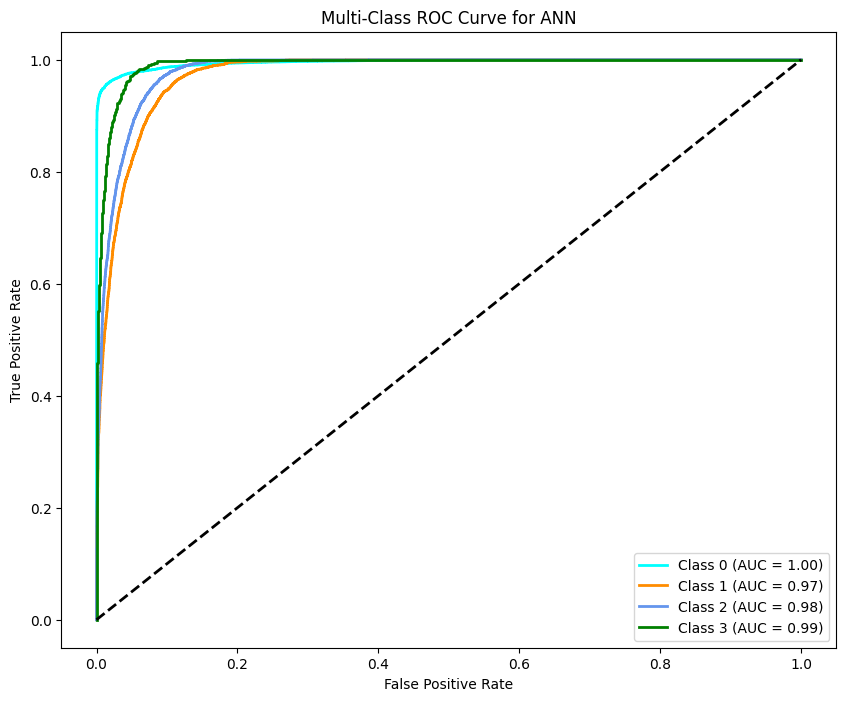

Overall Macro-Average AUC: 0.99


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

# Step 1: Binarize the test labels
n_classes = len(lb.classes_)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Step 2: Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_ann[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for ANN')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate the overall AUC score (macro-average)
overall_auc_ann = roc_auc_score(y_test_bin, y_test_proba_ann, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc_ann:.2f}")


# Test: deleting evspsbl, dist_crop

In [ ]:
! pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390768 sha256=ca17c46a5e705cb9f832d859a02b5fb5bc5e076a3baa75687e1c21e94b3653ed
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


<ipython-input-15-6ebbb7536d8b>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


Selected features using MRMR:
 ['dist_urban', 'lithology_6.0', 'soil_texture_2.0', 'soil_order_9.0', 'soil_order_5.0', 'lithology_2.0', 'lulc_5.0', 'dem', 'soil_order_3.0', 'lithology_21.0', 'txgt_30', 'lulc_4.0', 'soil_texture_1.0', 'lithology_13.0', 'lithology_1.0', 'soil_texture_4.0', 'lithology_5.0', 'soil_order_2.0', 'lithology_4.0', 'lulc_6.0']
Shape of X_train_mrmr: (170811, 20)
Shape of X_val_mrmr: (36602, 20)
Shape of X_test_mrmr: (36603, 20)
Top features by importance:
              Feature  Importance
0         dist_urban    0.397100
7                dem    0.250533
10           txgt_30    0.204025
11          lulc_4.0    0.031371
4     soil_order_5.0    0.029018
8     soil_order_3.0    0.024681
6           lulc_5.0    0.016465
17    soil_order_2.0    0.012150
2   soil_texture_2.0    0.011620
12  soil_texture_1.0    0.006568
14     lithology_1.0    0.004243
16     lithology_5.0    0.003539
3     soil_order_9.0    0.002738
15  soil_texture_4.0    0.001699
5      lithology_2.0

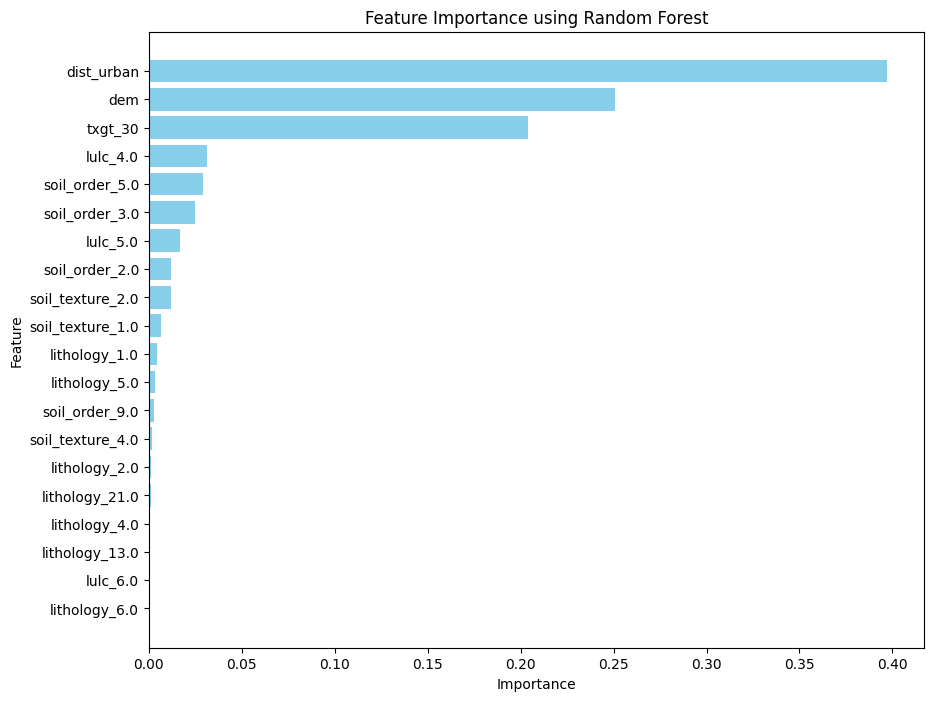

In [ ]:
import pandas as pd
import numpy as np
import pymrmr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value', 'mrsos', 'dist_crop', 'tg_mean', 'lai', 'mrro'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Define features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets (keep index columns for now)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Separate out index columns in the test set for later concatenation with predictions
index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

# Step 9: Drop index columns from the training, validation, and test sets before encoding/scaling
X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

# Step 10: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'hurs',
                     'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tx_max', 'txgt_30', 'dist_roads', 'dist_urban']

# Step 11: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 12: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 13: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)

# Step 14: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Step 15: Combine target and processed features for MRMR processing
df_mrmr = pd.concat([y_train.reset_index(drop=True), X_train_final.reset_index(drop=True)], axis=1)
df_mrmr.columns = ['target'] + list(df_mrmr.columns[1:])

# Step 16: Apply MRMR to select the top N features (e.g., top 20 features)
selected_features = pymrmr.mRMR(df_mrmr, 'MIQ', 20)
print("Selected features using MRMR:\n", selected_features)

# Step 17: Filter the training, validation, and test sets to include only selected features
X_train_mrmr = X_train_final[selected_features]
X_val_mrmr = X_val_final[selected_features]
X_test_mrmr = X_test_final[selected_features]

# Verify shapes
print("Shape of X_train_mrmr:", X_train_mrmr.shape)
print("Shape of X_val_mrmr:", X_val_mrmr.shape)
print("Shape of X_test_mrmr:", X_test_mrmr.shape)

# Step 18: Attach index columns back to the final test set for future mapping
X_test_with_index = pd.concat([X_test_index.reset_index(drop=True), X_test_mrmr.reset_index(drop=True)], axis=1)

# Step 19: Feature Importance using Random Forest
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the MRMR-selected training data
rf_model.fit(X_train_mrmr, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train_mrmr.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features by importance:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np


# Convert target labels to one-hot encoding for multi-class classification
lb = LabelBinarizer()
y_train_oh = lb.fit_transform(y_train)
y_val_oh = lb.transform(y_val)
y_test_oh = lb.transform(y_test)

# Define the ANN model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_mrmr.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(len(lb.classes_), activation='softmax')  # Output layer for multi-class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_mrmr, y_train_oh,
                    validation_data=(X_val_mrmr, y_val_oh),
                    epochs=30, batch_size=64, verbose=1)

# Predict probabilities for the test set
y_test_proba_ann = model.predict(X_test_mrmr)

# Convert probabilities to class predictions
y_test_pred_ann = np.argmax(y_test_proba_ann, axis=1)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_ann))

# Calculate AUC for multi-class
y_test_bin = lb.transform(y_test)  # Binarize for AUC calculation
roc_auc_ann = roc_auc_score(y_test_bin, y_test_proba_ann, average="macro")
print(f"\nOverall Macro-Average AUC: {roc_auc_ann:.2f}")


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2669/2669 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7982 - loss: 0.4686 - val_accuracy: 0.8282 - val_loss: 0.3921
Epoch 2/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8190 - loss: 0.4227 - val_accuracy: 0.8327 - val_loss: 0.3882
Epoch 3/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8222 - loss: 0.4164 - val_accuracy: 0.8362 - val_loss: 0.3791
Epoch 4/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8260 - loss: 0.4098 - val_accuracy: 0.8364 - val_loss: 0.3826
Epoch 5/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8267 - loss: 0.4112 - val_accuracy: 0.8379 - val_loss: 0.3821
Epoch 6/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8232 - loss: 0.4124 - val_accuracy: 0.8323 - val_loss: 0.3804
Epoch 7/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8247 - loss: 0.4103 - val_accuracy: 0.8365 - val_loss: 0.3822
Epoch 8/30
2669/2669 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8271 - loss: 0.4092 - val_accura

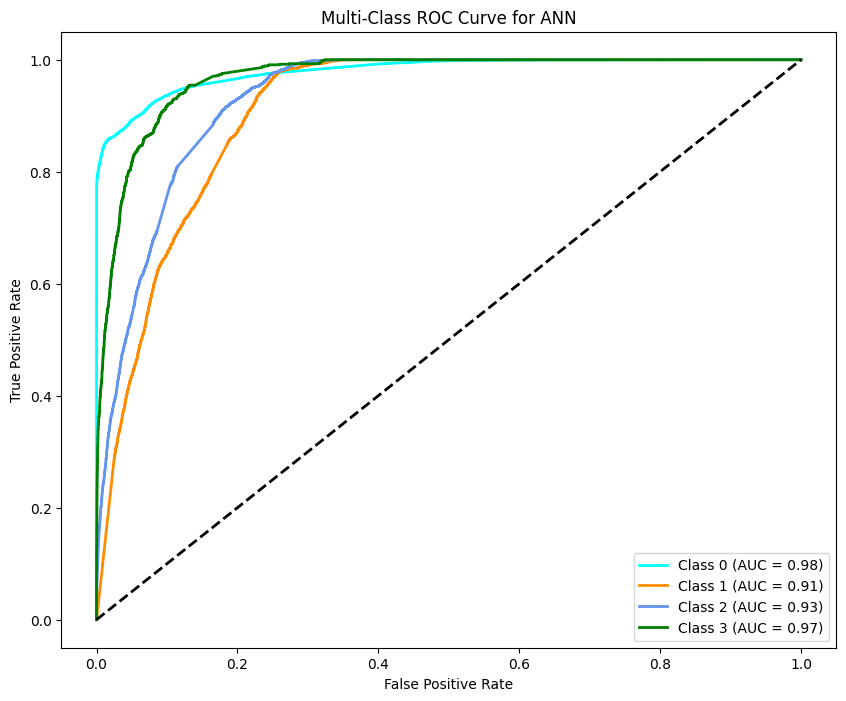

Overall Macro-Average AUC: 0.95


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

# Step 1: Binarize the test labels
n_classes = len(lb.classes_)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Step 2: Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_ann[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for ANN')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate the overall AUC score (macro-average)
overall_auc_ann = roc_auc_score(y_test_bin, y_test_proba_ann, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc_ann:.2f}")


# Approach 2:


In [ ]:
!pip install pytorch-tabnet

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Define features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets (keep index columns for now)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Separate out index columns in the test set for later concatenation with predictions
index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

# Step 9: Drop index columns from the training, validation, and test sets before encoding/scaling
X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

# Step 10: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

# Step 11: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 12: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 13: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)


<ipython-input-9-77712a2bdbaa>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Step 14: VIF analysis to identify multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print("VIF before dropping features:\n", vif_data)


VIF before dropping features:
          feature        VIF
0         aspect   1.007188
1            cdd   6.460827
2            dem   5.639565
3   dist_snowice   5.700898
4     dist_water   1.576561
5        evspsbl  28.681352
6           hurs   2.784799
7            lai   5.812866
8           mrro   7.050366
9          mrsos   2.503796
10       prcptot  83.317650
11         r10mm  51.936845
12          rlds  45.731787
13          rsds  13.570032
14       sfcWind   2.837277
15         slope   1.723387
16       tg_mean  81.852642
17        tx_max  30.206797
18       txgt_30   3.740467
19     dist_crop  72.162870
20    dist_roads  28.535904
21    dist_urban  35.203312


In [ ]:
# Drop features with high VIF (>10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
X_train_scaled = X_train_scaled.drop(columns=high_vif_features)
X_val_scaled = X_val_scaled.drop(columns=high_vif_features)
X_test_scaled = X_test_scaled.drop(columns=high_vif_features)

print("Dropped features due to high VIF:", high_vif_features.tolist())


Dropped features due to high VIF: ['evspsbl', 'prcptot', 'r10mm', 'rlds', 'rsds', 'tg_mean', 'tx_max', 'dist_crop', 'dist_roads', 'dist_urban']


In [ ]:
# Step 15: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Convert data to NumPy arrays (TabNet requires this format)
X_train_np = X_train_final.to_numpy()
X_val_np = X_val_final.to_numpy()
X_test_np = X_test_final.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()


In [ ]:
X_train_final.columns

Index(['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'hurs', 'lai',
       'mrro', 'mrsos', 'sfcWind', 'slope', 'txgt_30', 'lulc_1.0', 'lulc_2.0',
       'lulc_3.0', 'lulc_4.0', 'lulc_5.0', 'lulc_6.0', 'lulc_7.0',
       'soil_order_1.0', 'soil_order_2.0', 'soil_order_3.0', 'soil_order_4.0',
       'soil_order_5.0', 'soil_order_6.0', 'soil_order_7.0', 'soil_order_8.0',
       'soil_order_9.0', 'soil_order_10.0', 'soil_order_11.0',
       'soil_texture_1.0', 'soil_texture_2.0', 'soil_texture_3.0',
       'soil_texture_4.0', 'soil_texture_5.0', 'soil_texture_6.0',
       'soil_texture_7.0', 'soil_texture_8.0', 'soil_texture_9.0',
       'soil_texture_10.0', 'lithology_1.0', 'lithology_2.0', 'lithology_3.0',
       'lithology_4.0', 'lithology_5.0', 'lithology_6.0', 'lithology_7.0',
       'lithology_8.0', 'lithology_9.0', 'lithology_10.0', 'lithology_11.0',
       'lithology_12.0', 'lithology_13.0', 'lithology_14.0', 'lithology_15.0',
       'lithology_17.0', 'lithology_18.0', 'li

In [ ]:
# Step 9: Initialize and train the TabNet model
tabnet_model = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=0.01,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    mask_type='entmax',
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Train the model
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 10: Feature importance analysis
feature_importances = tabnet_model.feature_importances_
importance_df_tabnet = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("TabNet Feature Importances:\n", importance_df_tabnet)

# Optional: Retain only top features based on importance (if desired)
top_features = importance_df_tabnet[importance_df_tabnet['Importance'] > 0.01]['Feature']
X_train_top = X_train_final[top_features]
X_val_top = X_val_final[top_features]
X_test_top = X_test_final[top_features]

# Step 11: Retrain on top features if you choose to do feature selection
tabnet_model.fit(
    X_train=X_train_top.to_numpy(), y_train=y_train_np,
    eval_set=[(X_val_top.to_numpy(), y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 12: Evaluate on the test set
y_test_pred = tabnet_model.predict(X_test_top.to_numpy())
print("\nClassification Report:\n", classification_report(y_test_np, y_test_pred))
print("AUC Score:", roc_auc_score(label_binarize(y_test_np, classes=np.unique(y_test_np)), tabnet_model.predict_proba(X_test_top.to_numpy()), average="macro"))


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.58578 | val_accuracy: 0.81815 |  0:00:29s
epoch 1  | loss: 0.3972  | val_accuracy: 0.86465 |  0:00:59s
epoch 2  | loss: 0.33488 | val_accuracy: 0.88342 |  0:01:29s
epoch 3  | loss: 0.29655 | val_accuracy: 0.89361 |  0:01:58s
epoch 4  | loss: 0.26061 | val_accuracy: 0.90973 |  0:02:29s
epoch 5  | loss: 0.23651 | val_accuracy: 0.91869 |  0:02:58s
epoch 6  | loss: 0.22312 | val_accuracy: 0.91473 |  0:03:28s
epoch 7  | loss: 0.20615 | val_accuracy: 0.92771 |  0:03:58s
epoch 8  | loss: 0.1908  | val_accuracy: 0.93219 |  0:04:28s
epoch 9  | loss: 0.18205 | val_accuracy: 0.9391  |  0:04:57s
epoch 10 | loss: 0.17302 | val_accuracy: 0.9406  |  0:05:27s
epoch 11 | loss: 0.16646 | val_accuracy: 0.94298 |  0:05:56s
epoch 12 | loss: 0.1597  | val_accuracy: 0.94552 |  0:06:26s
epoch 13 | loss: 0.15474 | val_accuracy: 0.94987 |  0:06:56s
epoch 14 | loss: 0.15232 | val_accuracy: 0.95039 |  0:07:26s
epoch 15 | loss: 0.14601 | val_accuracy: 0.95243 |  0:07:55s
epoch 16 | loss: 0.14406

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Feature Importances:
              Feature    Importance
6                lai  4.493626e-01
8              mrsos  7.784697e-02
3       dist_snowice  5.603848e-02
21    soil_order_3.0  5.040539e-02
25    soil_order_7.0  4.776932e-02
..               ...           ...
32  soil_texture_3.0  7.061193e-08
58    lithology_20.0  4.709869e-08
72    lithology_35.0  1.741806e-08
15          lulc_4.0  7.989942e-09
14          lulc_3.0  5.290501e-10

[73 rows x 2 columns]
epoch 0  | loss: 0.47905 | val_accuracy: 0.83905 |  0:00:21s
epoch 1  | loss: 0.36414 | val_accuracy: 0.87058 |  0:00:44s
epoch 2  | loss: 0.32868 | val_accuracy: 0.87031 |  0:01:06s
epoch 3  | loss: 0.29769 | val_accuracy: 0.89525 |  0:01:28s
epoch 4  | loss: 0.27922 | val_accuracy: 0.89047 |  0:01:50s
epoch 5  | loss: 0.27103 | val_accuracy: 0.90039 |  0:02:12s
epoch 6  | loss: 0.27459 | val_accuracy: 0.90014 |  0:02:34s
epoch 7  | loss: 0.2543  | val_accuracy: 0.91031 |  0:02:56s
epoch 8  | loss: 0.24443 | val_accuracy:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     27085
         1.0       0.76      0.74      0.75      3911
         2.0       0.82      0.79      0.80      4616
         3.0       0.78      0.81      0.80       991

    accuracy                           0.93     36603
   macro avg       0.83      0.83      0.83     36603
weighted avg       0.93      0.93      0.93     36603

AUC Score: 0.9881073180918948


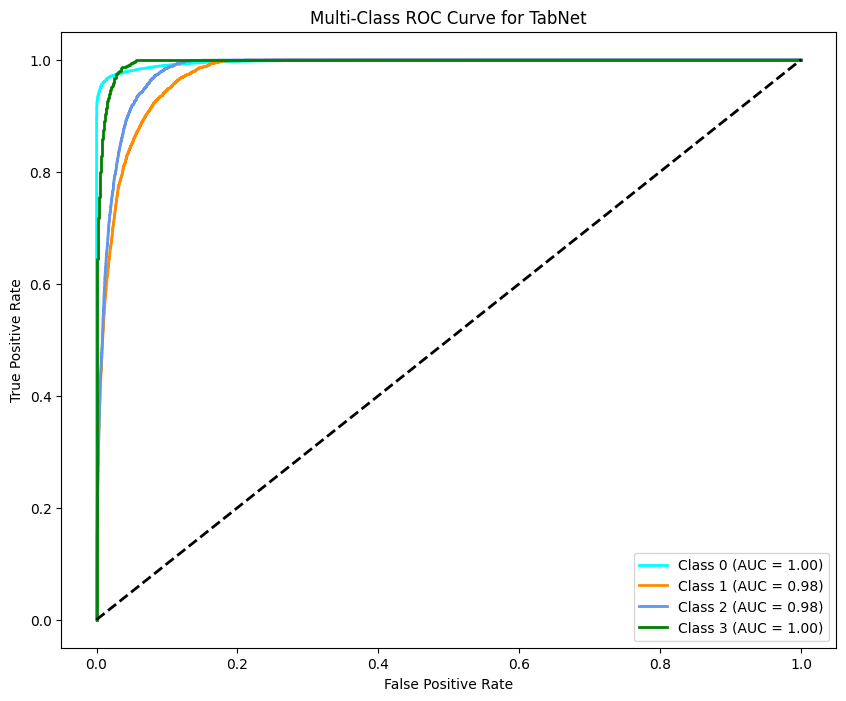

Overall Macro-Average AUC: 0.99


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Step 1: Get predicted probabilities for each class
y_test_proba = tabnet_model.predict_proba(X_test_top.to_numpy())

# Step 2: Binarize the test labels for multi-class ROC
n_classes = len(np.unique(y_test_np))  # Number of classes
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

# Step 3: Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for TabNet')
plt.legend(loc="lower right")
plt.show()

# Step 5: Calculate the overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.2f}")


# Approach 3: drop all the null values

In [ ]:
!pip install pytorch-tabnet

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Define features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets (keep index columns for now)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Separate out index columns in the test set for later concatenation with predictions
index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

# Step 9: Drop index columns from the training, validation, and test sets before encoding/scaling
X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

# Step 10: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

# Step 11: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 12: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 13: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)


<ipython-input-2-77712a2bdbaa>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Step 14: VIF analysis to identify multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print("VIF before dropping features:\n", vif_data)


VIF before dropping features:
          feature        VIF
0         aspect   1.007188
1            cdd   6.460827
2            dem   5.639565
3   dist_snowice   5.700898
4     dist_water   1.576561
5        evspsbl  28.681352
6           hurs   2.784799
7            lai   5.812866
8           mrro   7.050366
9          mrsos   2.503796
10       prcptot  83.317650
11         r10mm  51.936845
12          rlds  45.731787
13          rsds  13.570032
14       sfcWind   2.837277
15         slope   1.723387
16       tg_mean  81.852642
17        tx_max  30.206797
18       txgt_30   3.740467
19     dist_crop  72.162870
20    dist_roads  28.535904
21    dist_urban  35.203312


In [ ]:
# Drop features with high VIF (>10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
X_train_scaled = X_train_scaled.drop(columns=high_vif_features)
X_val_scaled = X_val_scaled.drop(columns=high_vif_features)
X_test_scaled = X_test_scaled.drop(columns=high_vif_features)

print("Dropped features due to high VIF:", high_vif_features.tolist())


Dropped features due to high VIF: ['evspsbl', 'prcptot', 'r10mm', 'rlds', 'rsds', 'tg_mean', 'tx_max', 'dist_crop', 'dist_roads', 'dist_urban']


In [ ]:
# Step 15: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Convert data to NumPy arrays (TabNet requires this format)
X_train_np = X_train_final.to_numpy()
X_val_np = X_val_final.to_numpy()
X_test_np = X_test_final.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_d': [4],               # Width of the decision prediction layer
    'n_a': [4],               # Width of the attention embedding for each mask
    'n_steps': [3],                 # Number of decision steps
    'gamma': [1.3],        # Relaxation factor
    'lambda_sparse': [0.5],  # Sparsity regularization
    'optimizer_fn': [torch.optim.Adam, torch.optim.AdamW],  # Optimizer choice
    'optimizer_params': [{'lr': 1e-2}],  # Learning rates to test
}

# Define a wrapper function for TabNet to be used with RandomizedSearchCV
def create_tabnet_model(n_d, n_a, n_steps, gamma, lambda_sparse, optimizer_fn, optimizer_params):
    return TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        mask_type='entmax',
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0,  # Set to 1 or 2 to see training logs
        seed=42
    )

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=create_tabnet_model(8, 8, 5, 1.5, 0.01, torch.optim.Adam, {'lr': 1e-2}),  # Initial model to start with
    param_distributions=param_dist,
    n_iter=3,   # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,        # 3-fold cross-validation
    random_state=42,
    verbose=3
)

# Fit random search on training data
random_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score from the search
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.3, lambda_sparse=0.5, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.925 total time=13.5min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.3, lambda_sparse=0.5, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.847 total time=13.7min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.3, lambda_sparse=0.5, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.915 total time=13.7min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.3, lambda_sparse=0.5, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.906 total time=13.8min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.3, lambda_sparse=0.5, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.926 total time=13.8min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.3, lambda_sparse=0.5, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.920 total time=13.6min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best parameters found:  {'optimizer_params': {'lr': 0.01}, 'optimizer_fn': <class 'torch.optim.adamw.AdamW'>, 'n_steps': 3, 'n_d': 4, 'n_a': 4, 'lambda_sparse': 0.5, 'gamma': 1.3}
Best cross-validation accuracy:  0.917587274824221


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.90719 | val_accuracy: 0.79258 |  0:00:17s
epoch 1  | loss: 0.47825 | val_accuracy: 0.81493 |  0:00:34s
epoch 2  | loss: 0.42904 | val_accuracy: 0.82157 |  0:00:52s
epoch 3  | loss: 0.40975 | val_accuracy: 0.82687 |  0:01:10s
epoch 4  | loss: 0.39707 | val_accuracy: 0.83214 |  0:01:28s
epoch 5  | loss: 0.39321 | val_accuracy: 0.83987 |  0:01:45s
epoch 6  | loss: 0.38328 | val_accuracy: 0.83408 |  0:02:03s
epoch 7  | loss: 0.38473 | val_accuracy: 0.8408  |  0:02:21s
epoch 8  | loss: 0.37907 | val_accuracy: 0.83299 |  0:02:38s
epoch 9  | loss: 0.38449 | val_accuracy: 0.83613 |  0:02:57s
epoch 10 | loss: 0.37164 | val_accuracy: 0.84318 |  0:03:14s
epoch 11 | loss: 0.36686 | val_accuracy: 0.84725 |  0:03:31s
epoch 12 | loss: 0.36668 | val_accuracy: 0.84673 |  0:03:50s
epoch 13 | loss: 0.36215 | val_accuracy: 0.84637 |  0:04:07s
epoch 14 | loss: 0.3638  | val_accuracy: 0.84386 |  0:04:24s
epoch 15 | loss: 0.3659  | val_accuracy: 0.84367 |  0:04:43s
epoch 16 | loss: 0.36349

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     27085
         1.0       0.62      0.24      0.35      3911
         2.0       0.57      0.79      0.67      4616
         3.0       0.65      0.15      0.25       991

    accuracy                           0.85     36603
   macro avg       0.69      0.54      0.55     36603
weighted avg       0.84      0.85      0.83     36603



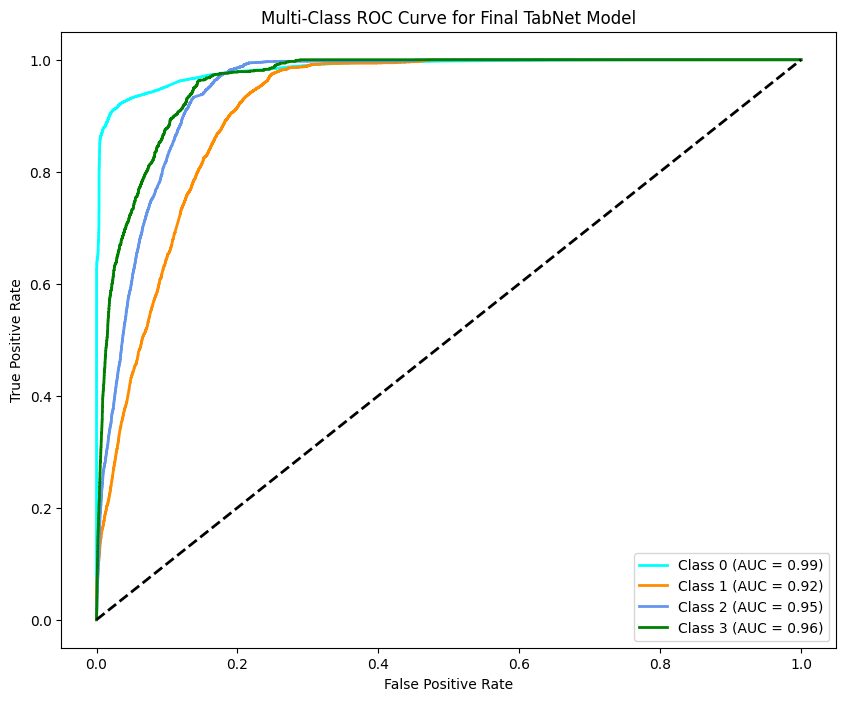

Overall Macro-Average AUC: 0.95


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Step 1: Retrieve best parameters and retrain the TabNet model
best_params = random_search.best_params_

# Initialize TabNet with best parameters
final_tabnet_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=best_params['optimizer_fn'],
    optimizer_params=best_params['optimizer_params'],
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Train the final model on the training data
final_tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 2: Evaluate the final model
y_test_pred = final_tabnet_model.predict(X_test_np)
y_test_proba = final_tabnet_model.predict_proba(X_test_np)

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 3: Calculate and plot ROC curve and AUC for each class
n_classes = len(np.unique(y_test_np))
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Final TabNet Model')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.2f}")


## Different Hyperparameters

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_d': [8],               # Width of the decision prediction layer
    'n_a': [8],               # Width of the attention embedding for each mask
    'n_steps': [3],                 # Number of decision steps
    'gamma': [1.3],        # Relaxation factor
    'lambda_sparse': [0.1, 0.2],  # Sparsity regularization
    'optimizer_fn': [torch.optim.Adam, torch.optim.AdamW],  # Optimizer choice
    'optimizer_params': [{'lr': 1e-2}],  # Learning rates to test
}

# Define a wrapper function for TabNet to be used with RandomizedSearchCV
def create_tabnet_model(n_d, n_a, n_steps, gamma, lambda_sparse, optimizer_fn, optimizer_params):
    return TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        mask_type='entmax',
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0,  # Set to 1 or 2 to see training logs
        seed=42
    )

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=create_tabnet_model(16, 16, 5, 1.5, 0.01, torch.optim.Adam, {'lr': 1e-2}),  # Initial model to start with
    param_distributions=param_dist,
    n_iter=3,   # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,        # 3-fold cross-validation
    random_state=42,
    verbose=3
)

# Fit random search on training data
random_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score from the search
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.950 total time=15.0min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.954 total time=14.8min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.952 total time=14.7min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.3, lambda_sparse=0.2, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.951 total time=14.4min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.3, lambda_sparse=0.2, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.938 total time=14.4min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.3, lambda_sparse=0.2, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.934 total time=14.7min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.934 total time=14.3min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.945 total time=14.4min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=8, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.950 total time=14.5min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best parameters found:  {'optimizer_params': {'lr': 0.01}, 'optimizer_fn': <class 'torch.optim.adamw.AdamW'>, 'n_steps': 3, 'n_d': 8, 'n_a': 8, 'lambda_sparse': 0.1, 'gamma': 1.3}
Best cross-validation accuracy:  0.9519703063620025


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.67304 | val_accuracy: 0.82766 |  0:00:18s
epoch 1  | loss: 0.42847 | val_accuracy: 0.83482 |  0:00:35s
epoch 2  | loss: 0.37731 | val_accuracy: 0.84902 |  0:00:54s
epoch 3  | loss: 0.34925 | val_accuracy: 0.86107 |  0:01:12s
epoch 4  | loss: 0.32481 | val_accuracy: 0.86779 |  0:01:30s
epoch 5  | loss: 0.30779 | val_accuracy: 0.87845 |  0:01:48s
epoch 6  | loss: 0.28864 | val_accuracy: 0.89077 |  0:02:07s
epoch 7  | loss: 0.27561 | val_accuracy: 0.89345 |  0:02:25s
epoch 8  | loss: 0.26548 | val_accuracy: 0.90637 |  0:02:43s
epoch 9  | loss: 0.25779 | val_accuracy: 0.90408 |  0:03:01s
epoch 10 | loss: 0.24017 | val_accuracy: 0.92151 |  0:03:19s
epoch 11 | loss: 0.22756 | val_accuracy: 0.92637 |  0:03:36s
epoch 12 | loss: 0.22316 | val_accuracy: 0.92673 |  0:03:55s
epoch 13 | loss: 0.21779 | val_accuracy: 0.92815 |  0:04:12s
epoch 14 | loss: 0.21636 | val_accuracy: 0.9314  |  0:04:30s
epoch 15 | loss: 0.21386 | val_accuracy: 0.92656 |  0:04:49s
epoch 16 | loss: 0.20186

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     27085
         1.0       0.78      0.79      0.78      3911
         2.0       0.84      0.83      0.84      4616
         3.0       0.76      0.80      0.78       991

    accuracy                           0.94     36603
   macro avg       0.84      0.85      0.85     36603
weighted avg       0.94      0.94      0.94     36603



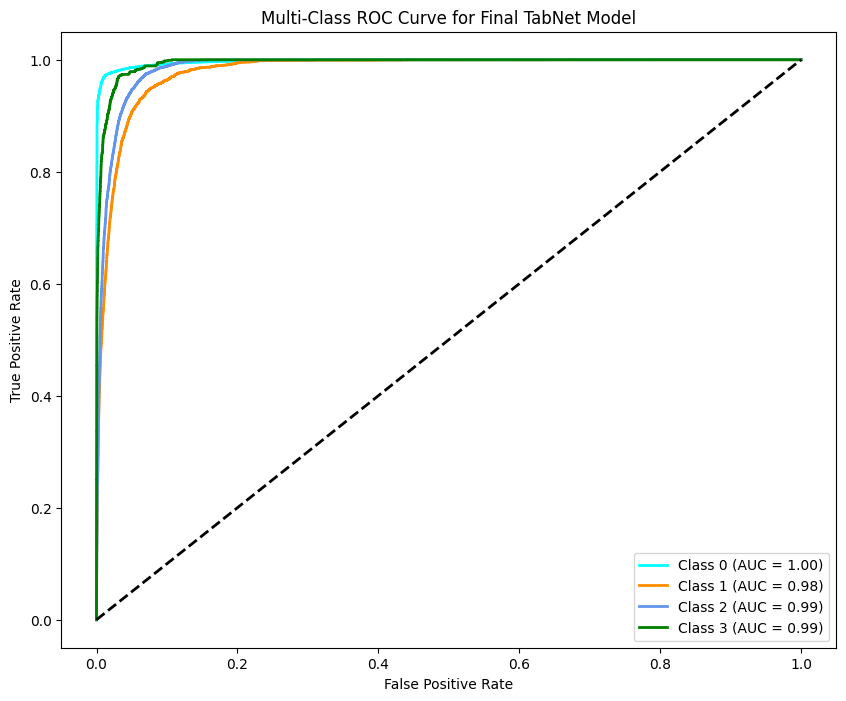

Overall Macro-Average AUC: 0.99


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Step 1: Retrieve best parameters and retrain the TabNet model
best_params = random_search.best_params_

# Initialize TabNet with best parameters
final_tabnet_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=best_params['optimizer_fn'],
    optimizer_params=best_params['optimizer_params'],
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Train the final model on the training data
final_tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 2: Evaluate the final model
y_test_pred = final_tabnet_model.predict(X_test_np)
y_test_proba = final_tabnet_model.predict_proba(X_test_np)

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 3: Calculate and plot ROC curve and AUC for each class
n_classes = len(np.unique(y_test_np))
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Final TabNet Model')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.2f}")


### different code for TabNet with Random search CV

In [ ]:
!pip install pytorch-tabnet

In [ ]:
import pandas as pd

df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])
df = df.dropna()
df.shape

(75657, 30)

In [ ]:
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])
df1 = df.fillna(method='ffill').fillna(method='bfill')
df1.shape

<ipython-input-3-830ffbf5a740>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


(244016, 30)

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Define features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets (keep index columns for now)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Separate out index columns in the test set for later concatenation with predictions
index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

# Step 9: Drop index columns from the training, validation, and test sets before encoding/scaling
X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

# Step 10: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

# Step 11: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 12: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 13: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)


<ipython-input-3-77712a2bdbaa>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Step 14: VIF analysis to identify multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print("VIF before dropping features:\n", vif_data)


VIF before dropping features:
          feature        VIF
0         aspect   1.007188
1            cdd   6.460827
2            dem   5.639565
3   dist_snowice   5.700898
4     dist_water   1.576561
5        evspsbl  28.681352
6           hurs   2.784799
7            lai   5.812866
8           mrro   7.050366
9          mrsos   2.503796
10       prcptot  83.317650
11         r10mm  51.936845
12          rlds  45.731787
13          rsds  13.570032
14       sfcWind   2.837277
15         slope   1.723387
16       tg_mean  81.852642
17        tx_max  30.206797
18       txgt_30   3.740467
19     dist_crop  72.162870
20    dist_roads  28.535904
21    dist_urban  35.203312


In [ ]:
# Drop features with high VIF (>10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
X_train_scaled = X_train_scaled.drop(columns=high_vif_features)
X_val_scaled = X_val_scaled.drop(columns=high_vif_features)
X_test_scaled = X_test_scaled.drop(columns=high_vif_features)

print("Dropped features due to high VIF:", high_vif_features.tolist())


Dropped features due to high VIF: ['evspsbl', 'prcptot', 'r10mm', 'rlds', 'rsds', 'tg_mean', 'tx_max', 'dist_crop', 'dist_roads', 'dist_urban']


In [ ]:
# Step 15: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Convert data to NumPy arrays (TabNet requires this format)
X_train_np = X_train_final.to_numpy()
X_val_np = X_val_final.to_numpy()
X_test_np = X_test_final.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.5, lambda_sparse=0.5, n_a=4, n_d=5, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.920 total time=12.5min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.5, lambda_sparse=0.5, n_a=4, n_d=5, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.853 total time=12.4min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.5, lambda_sparse=0.5, n_a=4, n_d=5, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.926 total time=12.3min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.5, lambda_sparse=0.5, n_a=5, n_d=4, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.919 total time=18.6min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.5, lambda_sparse=0.5, n_a=5, n_d=4, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.918 total time=18.5min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.5, lambda_sparse=0.5, n_a=5, n_d=4, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.914 total time=18.6min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/3] END gamma=1.3, lambda_sparse=0.4, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.883 total time=11.5min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/3] END gamma=1.3, lambda_sparse=0.4, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.896 total time=11.6min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 3/3] END gamma=1.3, lambda_sparse=0.4, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01};, score=0.914 total time=11.5min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best parameters found:  {'optimizer_params': {'lr': 0.01}, 'optimizer_fn': <class 'torch.optim.adam.Adam'>, 'n_steps': 5, 'n_d': 4, 'n_a': 5, 'lambda_sparse': 0.5, 'gamma': 1.5}
Best cross-validation accuracy:  0.9169959780107839


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.90965 | val_accuracy: 0.78955 |  0:00:22s
epoch 1  | loss: 0.49367 | val_accuracy: 0.79444 |  0:00:44s
epoch 2  | loss: 0.4665  | val_accuracy: 0.80113 |  0:01:07s
epoch 3  | loss: 0.45537 | val_accuracy: 0.81004 |  0:01:28s
epoch 4  | loss: 0.44346 | val_accuracy: 0.81864 |  0:01:52s
epoch 5  | loss: 0.42638 | val_accuracy: 0.81867 |  0:02:14s
epoch 6  | loss: 0.41728 | val_accuracy: 0.82916 |  0:02:36s
epoch 7  | loss: 0.42039 | val_accuracy: 0.81821 |  0:02:57s
epoch 8  | loss: 0.41815 | val_accuracy: 0.82023 |  0:03:20s
epoch 9  | loss: 0.42312 | val_accuracy: 0.81761 |  0:03:42s
epoch 10 | loss: 0.40619 | val_accuracy: 0.8302  |  0:04:04s
epoch 11 | loss: 0.38989 | val_accuracy: 0.82935 |  0:04:27s
epoch 12 | loss: 0.38394 | val_accuracy: 0.8396  |  0:04:49s
epoch 13 | loss: 0.37746 | val_accuracy: 0.84222 |  0:05:10s
epoch 14 | loss: 0.36739 | val_accuracy: 0.86181 |  0:05:33s
epoch 15 | loss: 0.3495  | val_accuracy: 0.85657 |  0:05:55s
epoch 16 | loss: 0.3486 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     27085
         1.0       0.58      0.57      0.57      3911
         2.0       0.62      0.72      0.67      4616
         3.0       0.70      0.43      0.53       991

    accuracy                           0.87     36603
   macro avg       0.72      0.67      0.68     36603
weighted avg       0.88      0.87      0.87     36603



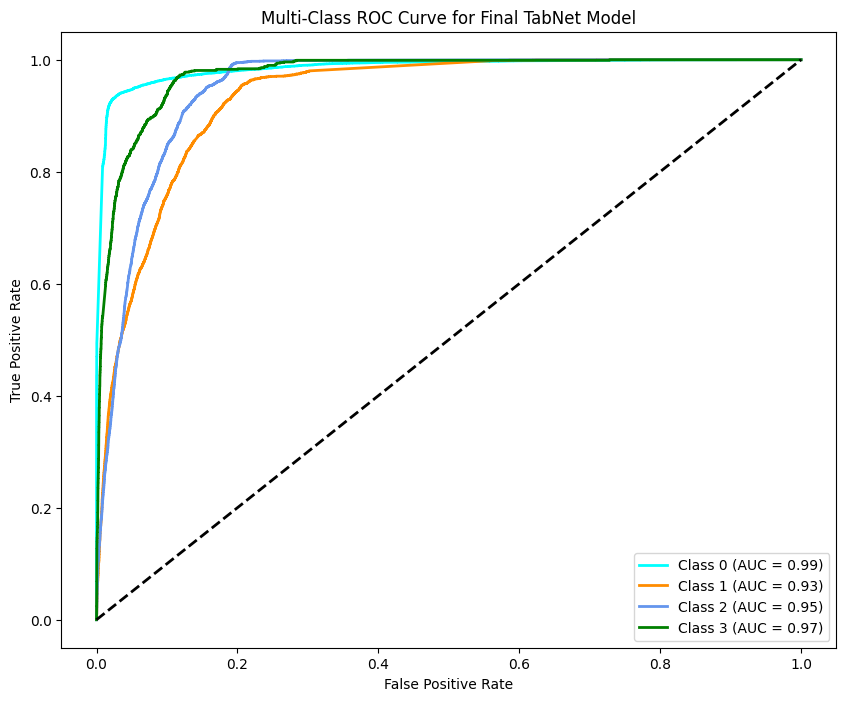

Overall Macro-Average AUC: 0.96


In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import torch
import matplotlib.pyplot as plt
from itertools import cycle
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the data and preprocess it (omitting initial steps for brevity if already processed)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_d': [4, 5],               # Width of the decision prediction layer
    'n_a': [4, 5],               # Width of the attention embedding for each mask
    'n_steps': [3, 5],            # Number of decision steps
    'gamma': [1.3, 1.5],          # Relaxation factor
    'lambda_sparse': [0.4, 0.5],  # Sparsity regularization values to test
    'optimizer_fn': [torch.optim.Adam, torch.optim.AdamW],  # Optimizer choice
    'optimizer_params': [{'lr': 1e-2}],  # Learning rates to test
}

# Define a wrapper function for TabNet to be used with RandomizedSearchCV
def create_tabnet_model(n_d, n_a, n_steps, gamma, lambda_sparse, optimizer_fn, optimizer_params):
    return TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        mask_type='entmax',
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0,
        seed=42
    )

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=create_tabnet_model(8, 8, 5, 1.5, 0.01, torch.optim.Adam, {'lr': 1e-2}),
    param_distributions=param_dist,
    n_iter=3,   # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,        # 3-fold cross-validation
    random_state=42,
    verbose=3
)

# Fit random search on training data
random_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score from the search
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)

# Step 1: Retrieve best parameters and retrain the TabNet model
best_params = random_search.best_params_

# Initialize TabNet with best parameters
final_tabnet_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=best_params['optimizer_fn'],
    optimizer_params=best_params['optimizer_params'],
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Train the final model on the training data
final_tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 2: Evaluate the final model
y_test_pred = final_tabnet_model.predict(X_test_np)
y_test_proba = final_tabnet_model.predict_proba(X_test_np)

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 3: Calculate and plot ROC curve and AUC for each class
n_classes = len(np.unique(y_test_np))
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Final TabNet Model')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.2f}")


# Different Hyperparameters

In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import torch
import matplotlib.pyplot as plt
from itertools import cycle
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the data and preprocess it (omitting initial steps for brevity if already processed)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_d': [5, 6, 7],               # Width of the decision prediction layer
    'n_a': [5, 6, 7],               # Width of the attention embedding for each mask
    'n_steps': [3, 5],            # Number of decision steps
    'gamma': [1.3, 1.5],          # Relaxation factor
    'lambda_sparse': [0.3, 0.4, 0.5],  # Sparsity regularization values to test
    'optimizer_fn': [torch.optim.Adam, torch.optim.AdamW],  # Optimizer choice
    'optimizer_params': [{'lr': 1e-2}],  # Learning rates to test
}

# Define a wrapper function for TabNet to be used with RandomizedSearchCV
def create_tabnet_model(n_d, n_a, n_steps, gamma, lambda_sparse, optimizer_fn, optimizer_params):
    return TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        mask_type='entmax',
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0,
        seed=42
    )

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=create_tabnet_model(8, 8, 5, 1.5, 0.01, torch.optim.Adam, {'lr': 1e-2}),
    param_distributions=param_dist,
    n_iter=3,   # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,        # 3-fold cross-validation
    random_state=42,
    verbose=3
)

# Fit random search on training data
random_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score from the search
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)

# Step 1: Retrieve best parameters and retrain the TabNet model
best_params = random_search.best_params_

# Initialize TabNet with best parameters
final_tabnet_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=best_params['optimizer_fn'],
    optimizer_params=best_params['optimizer_params'],
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Train the final model on the training data
final_tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 2: Evaluate the final model
y_test_pred = final_tabnet_model.predict(X_test_np)
y_test_proba = final_tabnet_model.predict_proba(X_test_np)

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 3: Calculate and plot ROC curve and AUC for each class
n_classes = len(np.unique(y_test_np))
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Final TabNet Model')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.2f}")


# README.md file

# Drought Susceptibility mapping with multi-class classification using DL
This project aims to classify drought susceptibility using deep learning. The dataset includes various spatial and climatological features, and the target variable (cdm_historical) has multiple classes representing different levels of drought susceptibility. This project uses the TabNet deep learning model for multi-class classification, combined with feature engineering, multicollinearity analysis, and hyperparameter tuning to improve model accuracy.

1. Data Loading and Initial Processing

* Load Data: Load the dataset from historical_2003-2014.csv.
* Drop Irrelevant Features: Remove columns such as GDP, population, and model-specific features (gdp, pop, cdm_model, cdm_p_value) that are not relevant to the classification task.
* Handle Missing Values: Fill any remaining missing values using forward and backward fill methods (ffill and bfill), then drop any rows where the target feature cdm_historical is null.
* Data Type Conversion: Convert categorical columns (lulc, lithology, soil_texture, soil_order) to the categorical data type.

2. Define Features and Target
* Separate the features (X) from the target variable (y), where y represents different drought classes in cdm_historical.

3. Splitting Data
* Train, Validation, and Test Split: Split the data into training, validation, and test sets. A 30% test set is first split from the data, followed by a 50/50 split of the remaining data for validation and test sets.
* Index Columns Management: Separate point_id, lat_dd, and long_dd columns (geographical identifiers) to retain them only in the test set for later reference during predictions.

4. Processing
* Encoding Categorical Features: Use one-hot encoding to transform categorical features into numerical representations.
* Scaling Numerical Features: Use standard scaling to normalize the numerical features for better model performance.

5. Multicollinearity Analysis
* Variance Inflation Factor (VIF): Conduct a VIF analysis on the numerical features in the training set to detect multicollinearity. Features with high VIF values (>10) are dropped to avoid redundancy in the model.

6. Feature Concatenation and Conversion

* Concatenate the scaled numerical features and one-hot encoded categorical features for the training, validation, and test sets.
* Convert the final processed data into NumPy arrays, which is a requirement for TabNet.

7. Hyperparameter Tuning
* Randomized Search for Hyperparameters: Use RandomizedSearchCV to perform hyperparameter tuning on the TabNet model. The search considers a range of parameters, including:
  * n_d and n_a: Width of decision prediction and attention embedding layers.
  * n_steps: Number of decision steps.
  * gamma: Relaxation factor.
  * lambda_sparse: Sparsity regularization to control overfitting.
  * optimizer_fn and optimizer_params: Optimizer choice and learning rate.
The best parameters and cross-validation accuracy are printed.

8. Trainig the Final TabNet Model
* Model Initialization: Initialize the TabNet model with the best parameters identified from hyperparameter tuning.
* Model Training: Train the model on the training set, using the validation set for early stopping to avoid overfitting. The model is trained for a maximum of 20 epochs with early stopping if validation accuracy does not improve for 10 epochs.

9. Model Evaluation

* Classification Report: Generate a classification report to evaluate precision, recall, and F1-score for each drought class.
  * ROC and AUC Scores:
  * Compute the ROC curve and AUC score for each class.
  * Plot the ROC curves for all classes.
  * Calculate the overall macro-average AUC score to assess the model’s general performance across all classes.

# Machine Learning Base model

1. Feature Selection using MRMR to select top 20 features
2. Training shallow ANN
3. Evaluation

In [ ]:
! pip install pymrmr

<ipython-input-5-233c8bdebb66>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5338/5338 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7440 - loss: 0.6206 - val_accuracy: 0.7941 - val_loss: 0.4545
Epoch 2/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7911 - loss: 0.4705 - val_accuracy: 0.8001 - val_loss: 0.4420
Epoch 3/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7954 - loss: 0.4636 - val_accuracy: 0.8031 - val_loss: 0.4359
Epoch 4/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7967 - loss: 0.4609 - val_accuracy: 0.8058 - val_loss: 0.4340
Epoch 5/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7975 - loss: 0.4561 - val_accuracy: 0.8012 - val_loss: 0.4362
Epoch 6/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8001 - loss: 0.4534 - val_accuracy: 0.8040 - val_loss: 0.4334
Epoch 7/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7989 - loss: 0.4536 - val_accuracy: 0.8045 - val_loss: 0.4311
Epoch 8/30
5338/5338 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7979 - loss: 0.4562 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


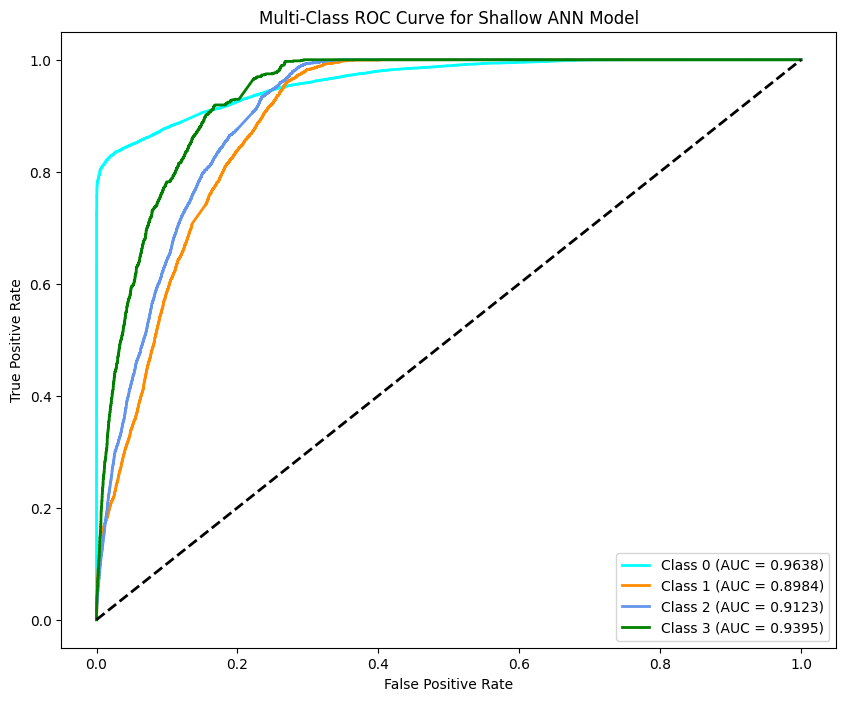

ANN Overall Macro-Average AUC: 0.9285


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from pymrmr import mRMR
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Load the data and preprocess (same as provided above)
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

df1 = df.fillna(method='ffill').fillna(method='bfill')
df1 = df1.dropna(subset=['cdm_historical'])
df1 = df1.dropna()
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)

# Step 2: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Step 3: Feature selection using mRMR
X_train_final['target'] = y_train.values  # Add the target column temporarily for mRMR

# Perform mRMR to select the top features
selected_features = mRMR(X_train_final, 'MIQ', 20)  # Select the top 20 features, adjust as needed

# Remove 'target' column if it's part of the selected features list
if 'target' in selected_features:
    selected_features.remove('target')

# Filter the training, validation, and test sets for the selected features
X_train_final = X_train_final[selected_features]
X_val_final = X_val_final[selected_features]
X_test_final = X_test_final[selected_features]

# Convert to NumPy arrays for use in the ANN model
X_train_np = X_train_final.to_numpy()
X_val_np = X_val_final.to_numpy()
X_test_np = X_test_final.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

# Step 4: Train the Shallow ANN on selected features

# Convert labels to categorical format for ANN
y_train_ann = to_categorical(y_train_np)
y_test_ann = to_categorical(y_test_np)

# Initialize the ANN model
ann_model = Sequential([
    Dense(16, input_shape=(X_train_np.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dense(y_train_ann.shape[1], activation='softmax')
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = ann_model.fit(X_train_np, y_train_ann, epochs=30, batch_size=32, validation_data=(X_val_np, to_categorical(y_val_np)), verbose=1)

# Evaluate the model on the test set
y_test_pred_ann = np.argmax(ann_model.predict(X_test_np), axis=1)

# Print classification report for ANN
print("ANN Classification Report:\n", classification_report(y_test_np, y_test_pred_ann))

# Step 5: ROC and AUC calculation
y_test_proba_ann = ann_model.predict(X_test_np)
y_test_bin_ann = label_binarize(y_test_np, classes=np.arange(len(np.unique(y_test_np))))

fpr_ann, tpr_ann, roc_auc_ann = {}, {}, {}
for i in range(len(np.unique(y_test_np))):
    fpr_ann[i], tpr_ann[i], _ = roc_curve(y_test_bin_ann[:, i], y_test_proba_ann[:, i])
    roc_auc_ann[i] = auc(fpr_ann[i], tpr_ann[i])

# Plot ROC curves for ANN
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(len(np.unique(y_test_np))), colors):
    plt.plot(fpr_ann[i], tpr_ann[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_ann[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Shallow ANN Model')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score (macro-average)
overall_auc_ann = roc_auc_score(y_test_bin_ann, y_test_proba_ann, average="macro")
print(f"ANN Overall Macro-Average AUC: {overall_auc_ann:.4f}")


<ipython-input-3-d697feced149>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     27085
         1.0       0.58      0.55      0.56      3911
         2.0       0.64      0.61      0.62      4616
         3.0       0.61      0.42      0.50       991

    accuracy                           0.86     36603
   macro avg       0.69      0.63      0.66     36603
weighted avg       0.85      0.86      0.85     36603



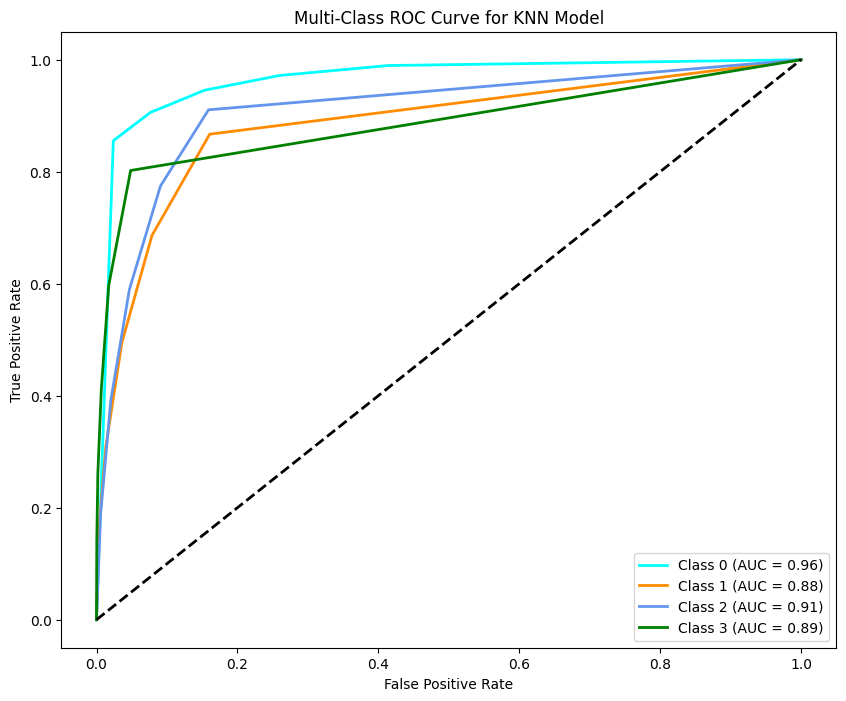

KNN Overall Macro-Average AUC: 0.9108


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from pymrmr import mRMR
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Step 1: Load the data and preprocess
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

df1 = df.fillna(method='ffill').fillna(method='bfill')
df1 = df1.dropna(subset=['cdm_historical'])
df1 = df1.dropna()
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)

# Step 2: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Step 3: Feature selection using mRMR
X_train_final['target'] = y_train.values  # Add the target column temporarily for mRMR

# Perform mRMR to select the top features
selected_features = mRMR(X_train_final, 'MIQ', 20)  # Select the top 20 features, adjust as needed

# Remove 'target' column if it's part of the selected features list
if 'target' in selected_features:
    selected_features.remove('target')

# Filter the training, validation, and test sets for the selected features
X_train_final = X_train_final[selected_features]
X_val_final = X_val_final[selected_features]
X_test_final = X_test_final[selected_features]

# Convert to NumPy arrays for use in the KNN model
X_train_np = X_train_final.to_numpy()
X_val_np = X_val_final.to_numpy()
X_test_np = X_test_final.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

# Step 4: Train the KNN model on selected features
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_np, y_train_np)

# Evaluate the model on the test set
y_test_pred_knn = knn_model.predict(X_test_np)

# Print classification report for KNN
print("KNN Classification Report:\n", classification_report(y_test_np, y_test_pred_knn))

# Step 5: ROC and AUC calculation for KNN
y_test_proba_knn = knn_model.predict_proba(X_test_np)
y_test_bin_knn = label_binarize(y_test_np, classes=np.arange(len(np.unique(y_test_np))))

fpr_knn, tpr_knn, roc_auc_knn = {}, {}, {}
for i in range(len(np.unique(y_test_np))):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin_knn[:, i], y_test_proba_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Plot ROC curves for KNN
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(len(np.unique(y_test_np))), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_knn[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score (macro-average)
overall_auc_knn = roc_auc_score(y_test_bin_knn, y_test_proba_knn, average="macro")
print(f"KNN Overall Macro-Average AUC: {overall_auc_knn:.4f}")


# Training TabNet model

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 1: Load the data and drop irrelevant features
df = pd.read_csv('historical_2003-2014.csv')
df = df.drop(columns=['gdp', 'pop', 'cdm_model', 'cdm_p_value'])

# Step 2: Fill null values using forward and backward fill
df1 = df.fillna(method='ffill').fillna(method='bfill')

# Step 3: Drop rows where the target feature 'cdm_historical' is null
df1 = df1.dropna(subset=['cdm_historical'])

# Step 4: Drop all remaining rows with null values
df1 = df1.dropna()

# Step 5: Convert categorical columns to 'category' data type
df1 = df1.astype({
    'lulc': 'category',
    'lithology': 'category',
    'soil_texture': 'category',
    'soil_order': 'category'
})

# Step 6: Define features (X) and target (y)
X = df1.drop(columns=['cdm_historical'])
y = df1['cdm_historical']

# Step 7: Split data into training, validation, and test sets (keep index columns for now)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 8: Separate out index columns in the test set for later concatenation with predictions
index_columns = ['point_id', 'lat_dd', 'long_dd']
X_test_index = X_test[index_columns]

# Step 9: Drop index columns from the training, validation, and test sets before encoding/scaling
X_train = X_train.drop(columns=index_columns)
X_val = X_val.drop(columns=index_columns)
X_test = X_test.drop(columns=index_columns)

# Step 10: Define categorical and numerical columns
categorical_columns = ['lulc', 'soil_order', 'soil_texture', 'lithology']
numerical_columns = ['aspect', 'cdd', 'dem', 'dist_snowice', 'dist_water', 'evspsbl', 'hurs',
                     'lai', 'mrro', 'mrsos', 'prcptot', 'r10mm', 'rlds', 'rsds', 'sfcWind',
                     'slope', 'tg_mean', 'tx_max', 'txgt_30', 'dist_crop', 'dist_roads', 'dist_urban']

# Step 11: Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Step 12: Encode categorical features
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Set column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_train_encoded.columns = encoded_column_names
X_val_encoded.columns = encoded_column_names
X_test_encoded.columns = encoded_column_names

# Step 13: Scale numerical features
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns)


<ipython-input-2-77712a2bdbaa>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Step 14: VIF analysis to identify multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print("VIF before dropping features:\n", vif_data)


VIF before dropping features:
          feature        VIF
0         aspect   1.007188
1            cdd   6.460827
2            dem   5.639565
3   dist_snowice   5.700898
4     dist_water   1.576561
5        evspsbl  28.681352
6           hurs   2.784799
7            lai   5.812866
8           mrro   7.050366
9          mrsos   2.503796
10       prcptot  83.317650
11         r10mm  51.936845
12          rlds  45.731787
13          rsds  13.570032
14       sfcWind   2.837277
15         slope   1.723387
16       tg_mean  81.852642
17        tx_max  30.206797
18       txgt_30   3.740467
19     dist_crop  72.162870
20    dist_roads  28.535904
21    dist_urban  35.203312


In [ ]:
# Drop features with high VIF (>10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
X_train_scaled = X_train_scaled.drop(columns=high_vif_features)
X_val_scaled = X_val_scaled.drop(columns=high_vif_features)
X_test_scaled = X_test_scaled.drop(columns=high_vif_features)

print("Dropped features due to high VIF:", high_vif_features.tolist())


Dropped features due to high VIF: ['evspsbl', 'prcptot', 'r10mm', 'rlds', 'rsds', 'tg_mean', 'tx_max', 'dist_crop', 'dist_roads', 'dist_urban']


In [ ]:
# Step 15: Concatenate encoded and scaled features
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Convert data to NumPy arrays (TabNet requires this format)
X_train_np = X_train_final.to_numpy()
X_val_np = X_val_final.to_numpy()
X_test_np = X_test_final.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_d': [4, 8, 16],               # Width of the decision prediction layer
    'n_a': [4, 8, 16],               # Width of the attention embedding for each mask
    'n_steps': [3, 5],               # Number of decision steps
    'gamma': [1.3, 1.7],        # Relaxation factor
    'lambda_sparse': [0.1, 0.2, 0.4],  # Sparsity regularization
    'optimizer_fn': [torch.optim.Adam, torch.optim.AdamW],  # Optimizer choice
    'optimizer_params': [{'lr': 1e-3}, {'lr': 5e-3}, {'lr': 1e-2}],  # Learning rates to test
}

# Define a wrapper function for TabNet to be used with RandomizedSearchCV
def create_tabnet_model(n_d, n_a, n_steps, gamma, lambda_sparse, optimizer_fn, optimizer_params):
    return TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        mask_type='entmax',
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0,  # Set to 1 or 2 to see training logs
        seed=42
    )

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=create_tabnet_model(16, 16, 5, 1.5, 0.01, torch.optim.Adam, {'lr': 1e-2}),  # Initial model to start with
    param_distributions=param_dist,
    n_iter=5,   # Number of parameter settings sampled
    scoring='accuracy',
    cv=2,        # 3-fold cross-validation
    random_state=42,
    verbose=3
)

# Fit random search on training data
random_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score from the search
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/2] END gamma=1.3, lambda_sparse=0.1, n_a=16, n_d=16, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.001};, score=0.904 total time=17.6min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/2] END gamma=1.3, lambda_sparse=0.1, n_a=16, n_d=16, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.001};, score=0.912 total time=17.2min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/2] END gamma=1.7, lambda_sparse=0.2, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.001};, score=0.853 total time= 9.8min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/2] END gamma=1.7, lambda_sparse=0.2, n_a=4, n_d=4, n_steps=3, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.001};, score=0.867 total time= 9.9min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/2] END gamma=1.3, lambda_sparse=0.4, n_a=8, n_d=8, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.001};, score=0.856 total time=15.2min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/2] END gamma=1.3, lambda_sparse=0.4, n_a=8, n_d=8, n_steps=5, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.001};, score=0.850 total time=15.4min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/2] END gamma=1.3, lambda_sparse=0.1, n_a=16, n_d=16, n_steps=5, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.005};, score=0.958 total time=17.3min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/2] END gamma=1.3, lambda_sparse=0.1, n_a=16, n_d=16, n_steps=5, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.005};, score=0.957 total time=17.2min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 1/2] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=16, n_steps=5, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.955 total time=16.2min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV 2/2] END gamma=1.3, lambda_sparse=0.1, n_a=8, n_d=16, n_steps=5, optimizer_fn=<class 'torch.optim.adamw.AdamW'>, optimizer_params={'lr': 0.01};, score=0.956 total time=16.7min


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best parameters found:  {'optimizer_params': {'lr': 0.005}, 'optimizer_fn': <class 'torch.optim.adamw.AdamW'>, 'n_steps': 5, 'n_d': 16, 'n_a': 16, 'lambda_sparse': 0.1, 'gamma': 1.3}
Best cross-validation accuracy:  0.9574207722309593


The cross-validation process has effectively identified the best hyperparameters
* Optimizer_params: {'lr': 0.005}
* n_steps: 5
* n_d: 16
* n_a: 16
* lambda_sparse: 0.1
* gamma: 1.3


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.76798 | val_accuracy: 0.80761 |  0:00:29s
epoch 1  | loss: 0.49587 | val_accuracy: 0.83203 |  0:00:58s
epoch 2  | loss: 0.42034 | val_accuracy: 0.8573  |  0:01:27s
epoch 3  | loss: 0.37483 | val_accuracy: 0.86173 |  0:01:56s
epoch 4  | loss: 0.35007 | val_accuracy: 0.87364 |  0:02:25s
epoch 5  | loss: 0.32157 | val_accuracy: 0.8841  |  0:02:55s
epoch 6  | loss: 0.29245 | val_accuracy: 0.89839 |  0:03:24s
epoch 7  | loss: 0.27482 | val_accuracy: 0.90522 |  0:03:52s
epoch 8  | loss: 0.25863 | val_accuracy: 0.90858 |  0:04:21s
epoch 9  | loss: 0.24309 | val_accuracy: 0.92224 |  0:04:50s
epoch 10 | loss: 0.22797 | val_accuracy: 0.92347 |  0:05:19s
epoch 11 | loss: 0.21486 | val_accuracy: 0.92891 |  0:05:48s
epoch 12 | loss: 0.20822 | val_accuracy: 0.92938 |  0:06:17s
epoch 13 | loss: 0.20458 | val_accuracy: 0.93298 |  0:06:46s
epoch 14 | loss: 0.1969  | val_accuracy: 0.93831 |  0:07:15s
epoch 15 | loss: 0.19112 | val_accuracy: 0.93631 |  0:07:43s
epoch 16 | loss: 0.18719

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     27085
         1.0       0.79      0.79      0.79      3911
         2.0       0.85      0.84      0.85      4616
         3.0       0.83      0.80      0.81       991

    accuracy                           0.94     36603
   macro avg       0.86      0.86      0.86     36603
weighted avg       0.94      0.94      0.94     36603



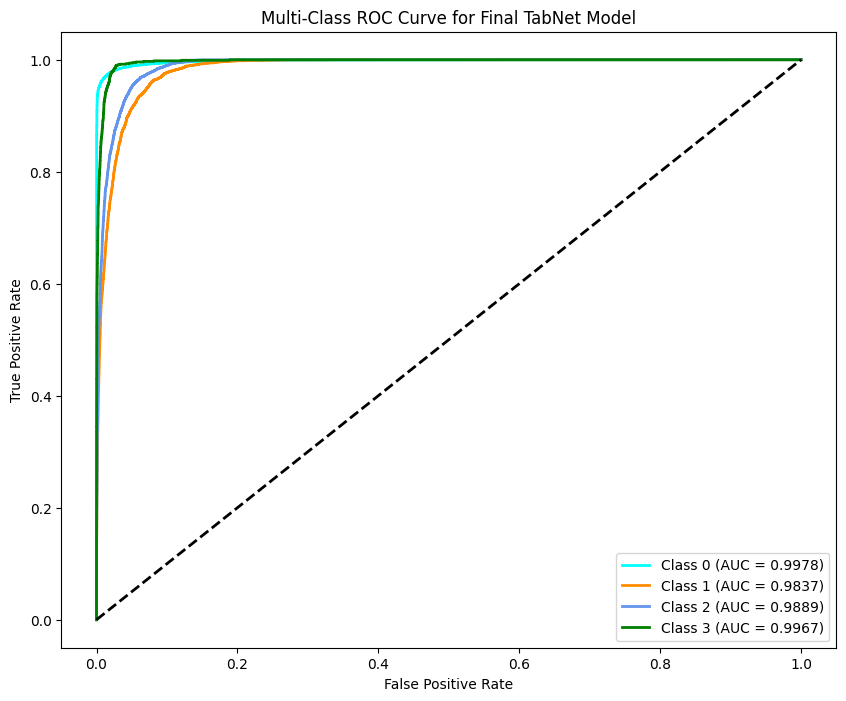

Overall Macro-Average AUC: 0.9918


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Step 1: Retrieve best parameters and retrain the TabNet model
best_params = random_search.best_params_

# Initialize TabNet with best parameters
final_tabnet_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=best_params['optimizer_fn'],
    optimizer_params=best_params['optimizer_params'],
    mask_type='entmax',
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

# Train the final model on the training data
final_tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 2: Evaluate the final model
y_test_pred = final_tabnet_model.predict(X_test_np)
y_test_proba = final_tabnet_model.predict_proba(X_test_np)

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 3: Calculate and plot ROC curve and AUC for each class
n_classes = len(np.unique(y_test_np))
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Final TabNet Model')
plt.legend(loc="lower right")
plt.show()

# Step 4: Calculate overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.4f}")


## train the TabNet model using the best hyperparameters obtained from the random search

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Initialize TabNet with the best hyperparameters
final_tabnet_model = TabNetClassifier(
    n_d=16,  # Width of the decision prediction layer
    n_a=16,  # Width of the attention embedding for each mask
    n_steps=5,  # Number of decision steps
    gamma=1.3,  # Relaxation factor
    lambda_sparse=0.1,  # Sparsity regularization
    optimizer_fn=torch.optim.AdamW,  # Optimizer choice
    optimizer_params={'lr': 0.005},  # Learning rate
    mask_type='entmax',  # Mask type for feature selection
    scheduler_params={"step_size": 10, "gamma": 0.9},  # Learning rate scheduler parameters
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler function
    verbose=1,  # Verbosity level
    seed=42  # Random seed for reproducibility
)

# Train the final model on the training data
final_tabnet_model.fit(
    X_train_np, y_train_np,  # Training features and labels
    eval_set=[(X_val_np, y_val_np)],  # Validation set
    eval_name=['val'],  # Name of the evaluation set
    eval_metric=['accuracy'],  # Evaluation metric
    max_epochs=50,  # Maximum number of epochs
    patience=10,  # Early stopping patience
    batch_size=512,  # Batch size
    virtual_batch_size=128,  # Virtual batch size for large datasets
    num_workers=0,  # Number of workers for data loading
    drop_last=False  # Whether to drop the last incomplete batch
)

# Evaluate the model on the test set
y_test_pred = final_tabnet_model.predict(X_test_np)
y_test_proba = final_tabnet_model.predict_proba(X_test_np)

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_test_pred))

# Step 3: Calculate and plot ROC curve and AUC for each class
n_classes = len(np.unique(y_test_np))
y_test_bin = label_binarize(y_test_np, classes=np.arange(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Final TabNet Model')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score (macro-average)
overall_auc = roc_auc_score(y_test_bin, y_test_proba, average="macro")
print(f"Overall Macro-Average AUC: {overall_auc:.4f}")
